# Introduction

    The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.
    

In [1]:
#Importing required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

# Data Analysis

In [2]:
#Load Dataset
bank=pd.read_csv('Bank Marketing.csv')
bank

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Contact,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,2
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,2
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,2
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,1


In [3]:
bank.isna().sum()#check null values

Age                      0
Job                      0
Marital Status           0
Education                0
Credit                   0
Balance (euros)          0
Housing Loan             0
Personal Loan            0
Contact                  0
Last Contact Day         0
Last Contact Month       0
Last Contact Duration    0
Campaign                 0
Pdays                    0
Previous                 0
Poutcome                 0
Subscription             0
dtype: int64

In [4]:
bank.describe()

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,Subscription
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,1.116985
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.321406
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,1.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,1.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,1.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,2.000000


In [5]:
#bank.Job.unique()
#bank.Subscription.unique()
bank.Contact.unique()
bank.groupby('Subscription').mean()

,Age,Balance (euros),Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous
Subscription,,,,,,,
1,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
2,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Age                    45211 non-null  int64 
 1   Job                    45211 non-null  object
 2   Marital Status         45211 non-null  object
 3   Education              45211 non-null  object
 4   Credit                 45211 non-null  object
 5   Balance (euros)        45211 non-null  int64 
 6   Housing Loan           45211 non-null  object
 7   Personal Loan          45211 non-null  object
 8   Contact                45211 non-null  object
 9   Last Contact Day       45211 non-null  int64 
 10  Last Contact Month     45211 non-null  object
 11  Last Contact Duration  45211 non-null  int64 
 12  Campaign               45211 non-null  int64 
 13  Pdays                  45211 non-null  int64 
 14  Previous               45211 non-null  int64 
 15  Poutcome           

# Data Visualization

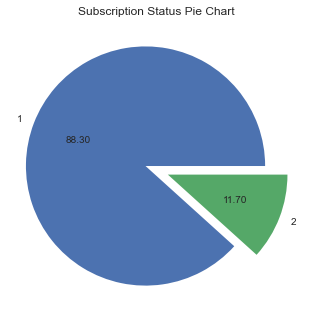

In [7]:
plt.style.use('seaborn')
plt.pie(bank.Subscription.value_counts(),labels=bank.Subscription.unique(), explode=[0.1,0.1],autopct='%.2f')
plt.title('Subscription Status Pie Chart')
plt.show()

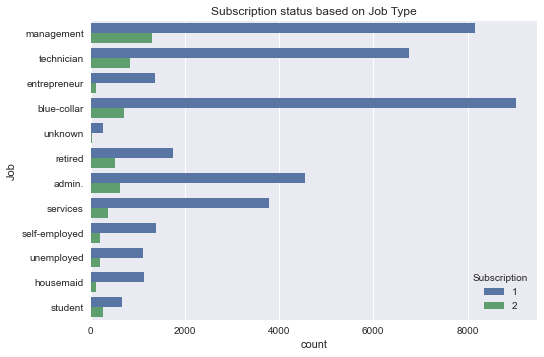

In [8]:
#Subscription Status based on Job type
sns.countplot(y='Job',hue='Subscription',data=bank)
plt.title("Subscription status based on Job Type")
plt.show()

In [9]:
un=bank.loc[bank['Job']=='unknown','Subscription']
un.value_counts()

1    254
2     34
Name: Subscription, dtype: int64

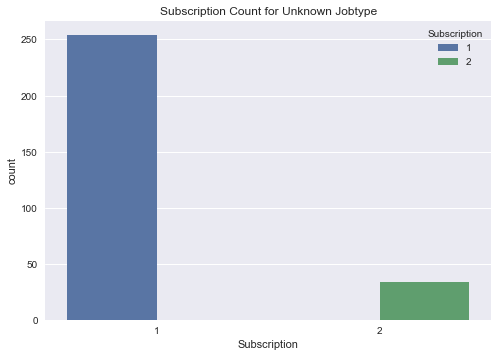

In [10]:
sns.countplot(x=un,hue='Subscription',data=bank)
plt.title("Subscription Count for Unknown Jobtype")
plt.show()

In [11]:
ue=bank.loc[bank['Job']=='unemployed','Subscription']
ue.value_counts()

1    1101
2     202
Name: Subscription, dtype: int64

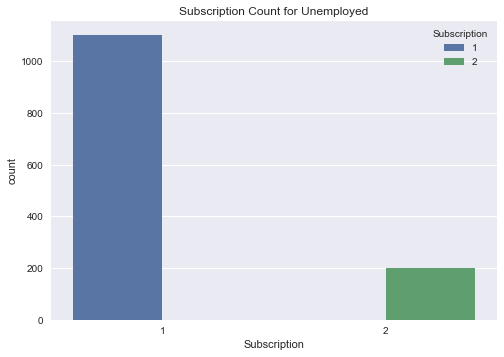

In [12]:
sns.countplot(x=ue,hue='Subscription',data=bank)
plt.title("Subscription Count for Unemployed")
plt.show()

In [13]:
bank.drop(['Contact'],inplace=True,axis=1)
bank.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,1


In [14]:
cr=bank.loc[bank['Credit']=='yes','Subscription']
cr.value_counts()

1    763
2     52
Name: Subscription, dtype: int64

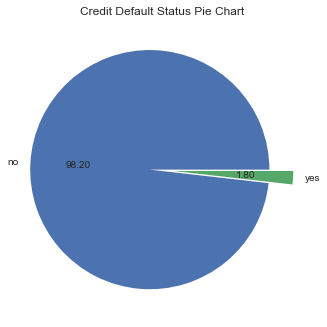

In [15]:
plt.style.use('seaborn')
plt.pie(bank.Credit.value_counts(),labels=bank.Credit.unique(), explode=[0.1,0.1],autopct='%.2f')
plt.title('Credit Default Status Pie Chart')
plt.show()

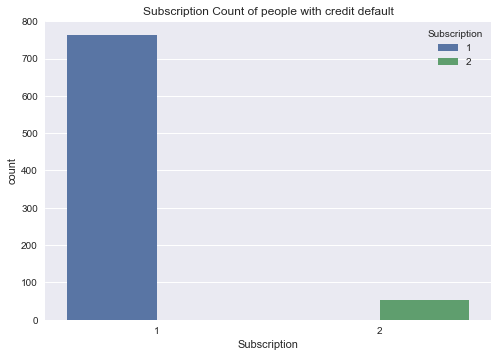

In [16]:
sns.countplot(x=cr,hue='Subscription',data=bank)
plt.title("Subscription Count of people with credit default")
plt.show()

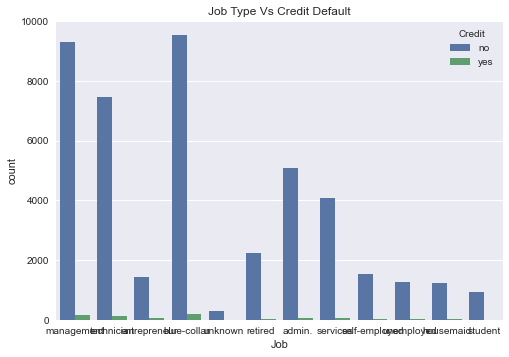

In [17]:
sns.countplot(x='Job',hue='Credit',data=bank)
plt.title("Job Type Vs Credit Default")
plt.show()

In [18]:
cr1=bank.loc[bank['Credit']=='no','Subscription']
cr1.value_counts()

1    39159
2     5237
Name: Subscription, dtype: int64

In [19]:
bal=bank[bank['Balance (euros)']<0]['Balance (euros)']
ag=bank[bank['Balance (euros)']<0]['Age']
bal
ag

25       44
28       46
36       25
37       53
45       36
         ..
44626    31
44629    28
44836    33
44908    48
44964    21
Name: Age, Length: 3766, dtype: int64

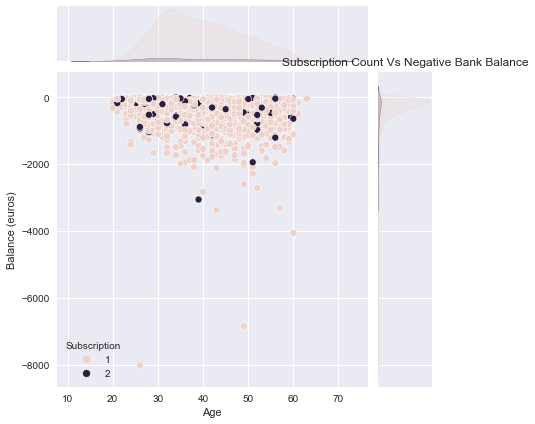

In [20]:
sns.jointplot(y=bal,x=ag,hue='Subscription',data=bank)
plt.title("Subscription Count Vs Negative Bank Balance")
plt.show()

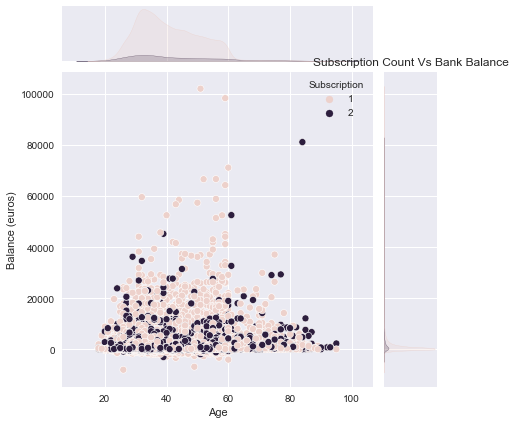

In [21]:
sns.jointplot(y=bank['Balance (euros)'],x=bank['Age'],hue='Subscription',data=bank)
plt.title("Subscription Count Vs Bank Balance")
plt.show()

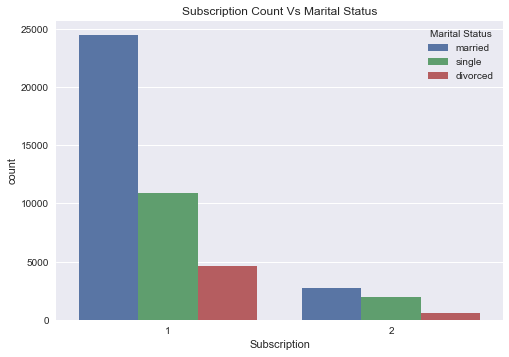

In [22]:
sns.countplot(x='Subscription',hue='Marital Status',data=bank)
plt.title("Subscription Count Vs Marital Status")
plt.show()

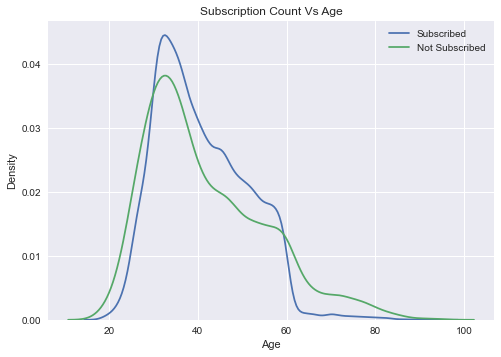

In [23]:
sns.kdeplot(bank.loc[bank['Subscription']==1,'Age'],label='Subscribed')
sns.kdeplot(bank.loc[bank['Subscription']==2,'Age'],label='Not Subscribed')
plt.title("Subscription Count Vs Age")
plt.legend()
plt.show()


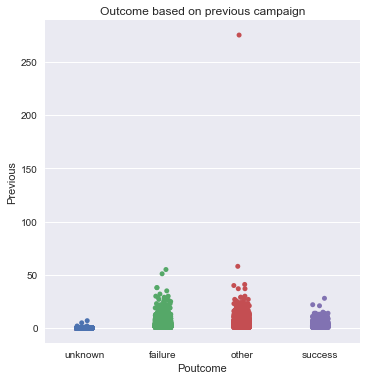

In [24]:
sns.catplot(y='Previous',x='Poutcome',data=bank)
plt.title("Outcome based on previous campaign")
plt.show()

In [25]:
s=bank['Poutcome'].value_counts()
bank['Poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: Poutcome, dtype: int64

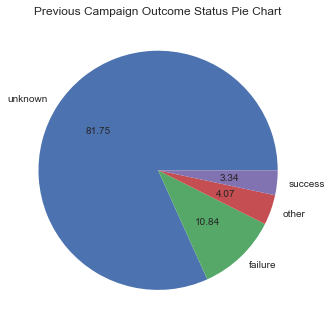

In [26]:
plt.style.use('seaborn')
plt.pie(s,labels=bank.Poutcome.unique(), autopct='%.2f')
plt.title('Previous Campaign Outcome Status Pie Chart')
plt.show()

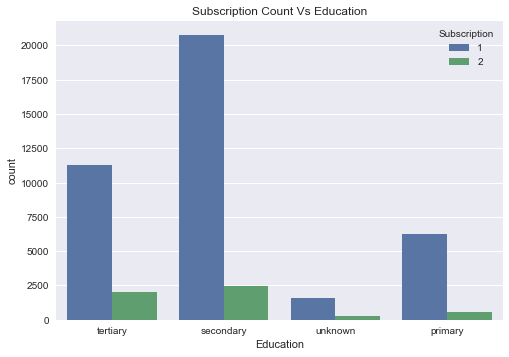

In [27]:
sns.countplot(x='Education',hue='Subscription',data=bank)
plt.title("Subscription Count Vs Education")
plt.show()

<AxesSubplot:xlabel='Campaign', ylabel='Count'>

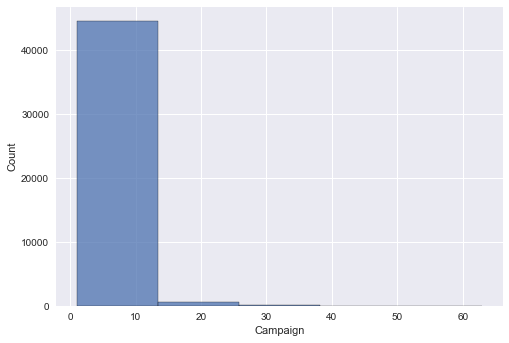

In [28]:
sns.histplot(x='Campaign',bins=5,data=bank)

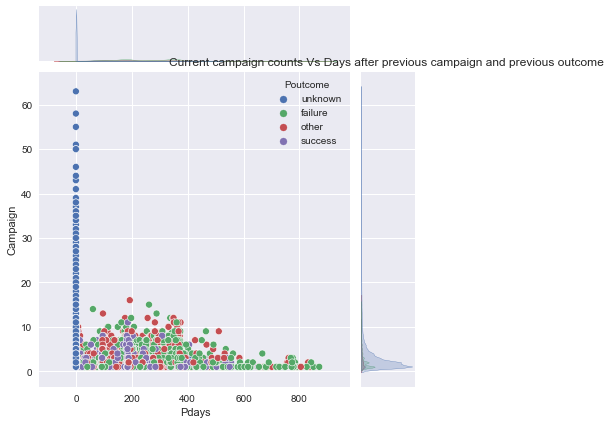

In [29]:
sns.jointplot(y='Campaign',x='Pdays',hue='Poutcome',data=bank)
plt.title("Current campaign counts Vs Days after previous campaign and previous outcome ")
plt.show()

In [30]:
bank.Pdays.value_counts()
#-1 indicates that the client was not previously contacted

-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 465        1
 529        1
 18         1
 434        1
 831        1
Name: Pdays, Length: 559, dtype: int64

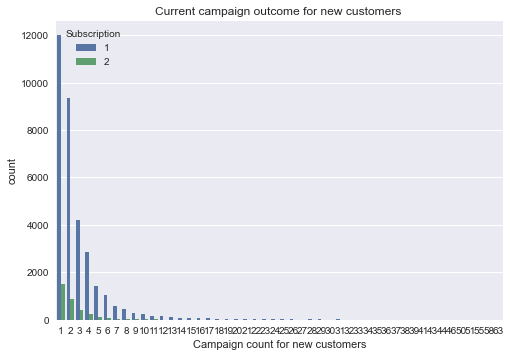

36954

In [31]:
p=bank[bank['Pdays']==-1]['Campaign']
sns.countplot(x=p,hue='Subscription',data=bank,orient='h')
plt.title("Current campaign outcome for new customers ")
plt.xlabel("Campaign count for new customers")
plt.show()
len(p)

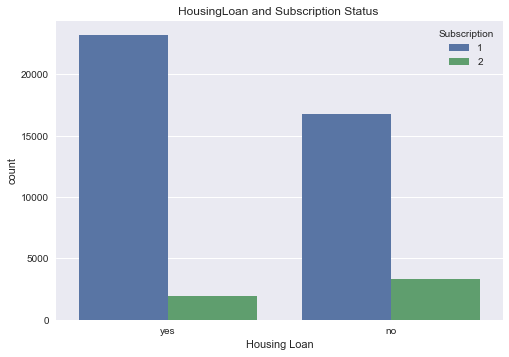

In [32]:
sns.countplot(x='Housing Loan',hue='Subscription',data=bank)
plt.title("HousingLoan and Subscription Status ")
plt.show()

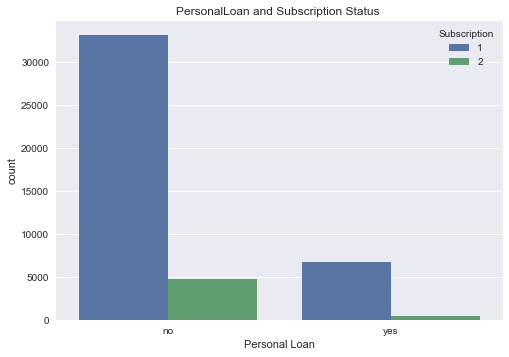

In [33]:
sns.countplot(x='Personal Loan',hue='Subscription',data=bank)
plt.title("PersonalLoan and Subscription Status ")
plt.show()

In [34]:
bank.head()

,Age,Job,Marital Status,Education,Credit,Balance (euros),Housing Loan,Personal Loan,Last Contact Day,Last Contact Month,Last Contact Duration,Campaign,Pdays,Previous,Poutcome,Subscription
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,1
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,1
3,47,blue-collar,married,unknown,no,1506,yes,no,5,may,92,1,-1,0,unknown,1
4,33,unknown,single,unknown,no,1,no,no,5,may,198,1,-1,0,unknown,1


In [35]:
bank.dtypes


Age                       int64
Job                      object
Marital Status           object
Education                object
Credit                   object
Balance (euros)           int64
Housing Loan             object
Personal Loan            object
Last Contact Day          int64
Last Contact Month       object
Last Contact Duration     int64
Campaign                  int64
Pdays                     int64
Previous                  int64
Poutcome                 object
Subscription              int64
dtype: object

# Data Encoding

In [36]:
# Defining the function
def dummies(x,df):
    temp = pd.get_dummies(df[x], drop_first = True)
    df = pd.concat([df, temp], axis = 1)
    df.drop([x], axis = 1, inplace = True)
    return df
# Applying the function to bank
bank = dummies('Job',bank)
bank = dummies('Marital Status',bank)
bank = dummies('Education',bank)
bank = dummies('Last Contact Month',bank)


In [37]:
label=LabelEncoder()
def l_encoder(x,df):
    df[x]=label.fit_transform(df[x])
    return df

bank = l_encoder('Credit',bank)
bank = l_encoder('Housing Loan',bank)
bank = l_encoder('Personal Loan',bank)
bank = l_encoder('Poutcome',bank)
bank.head()

,Age,Credit,Balance (euros),Housing Loan,Personal Loan,Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,0,1,0,0,0


In [38]:
bank.dtypes

Age                      int64
Credit                   int32
Balance (euros)          int64
Housing Loan             int32
Personal Loan            int32
Last Contact Day         int64
Last Contact Duration    int64
Campaign                 int64
Pdays                    int64
Previous                 int64
Poutcome                 int32
Subscription             int64
blue-collar              uint8
entrepreneur             uint8
housemaid                uint8
management               uint8
retired                  uint8
self-employed            uint8
services                 uint8
student                  uint8
technician               uint8
unemployed               uint8
unknown                  uint8
married                  uint8
single                   uint8
secondary                uint8
tertiary                 uint8
unknown                  uint8
aug                      uint8
dec                      uint8
feb                      uint8
jan                      uint8
jul     

In [39]:
def add_loans(loan):
    x=loan[0]+loan[1]
    if (x==0):
        return 0
    else:
        return 1
    
bank['Loan']=bank[['Housing Loan','Personal Loan']].apply(add_loans,axis=1)
bank['Loan']

0        1
1        1
2        1
3        1
4        0
        ..
45206    0
45207    0
45208    0
45209    0
45210    0
Name: Loan, Length: 45211, dtype: int64

In [40]:
bank.head()

,Age,Credit,Balance (euros),Housing Loan,Personal Loan,Last Contact Day,Last Contact Duration,Campaign,Pdays,Previous,...,feb,jan,jul,jun,mar,may,nov,oct,sep,Loan
0,58,0,2143,1,0,5,261,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
1,44,0,29,1,0,5,151,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
2,33,0,2,1,1,5,76,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
3,47,0,1506,1,0,5,92,1,-1,0,...,0,0,0,0,0,1,0,0,0,1
4,33,0,1,0,0,5,198,1,-1,0,...,0,0,0,0,0,1,0,0,0,0


# Data Preprocessing

In [41]:
#Splitting to x and y 
X=bank.drop(['Subscription','Housing Loan','Personal Loan'],axis=1)
y=bank['Subscription']
print(len(X))
print(len(y))

45211
45211


In [42]:
#Divide into training and testing set
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [43]:
#Data Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train

array([[-0.17851996, -0.13687553,  0.94171284, ..., -0.13000681,
        -0.11213559,  0.78630511],
       [ 0.29239954, -0.13687553, -0.23843122, ..., -0.13000681,
        -0.11213559, -1.27177096],
       [ 0.48076734, -0.13687553, -0.31005466, ..., -0.13000681,
        -0.11213559,  0.78630511],
       ...,
       [-0.36688777, -0.13687553, -0.42668917, ..., -0.13000681,
        -0.11213559,  0.78630511],
       [ 0.66913514, -0.13687553, -0.37083602, ..., -0.13000681,
        -0.11213559,  0.78630511],
       [ 0.38658344, -0.13687553,  0.15582626, ..., -0.13000681,
        -0.11213559, -1.27177096]])

# Data Modelling

In [44]:
model_log=LogisticRegression()
#model_knn=KNeighborsClassifier(n_neighbors=5)
model_rf=RandomForestClassifier(n_estimators=7)
model_nb=GaussianNB()
model_log.fit(X_train,y_train)
#model_knn.fit(X_train,y_train)
model_rf.fit(X_train,y_train)
model_nb.fit(X_train,y_train)

GaussianNB()

# Predictions

In [45]:
pred_log=model_log.predict(X_test)
print(metrics.accuracy_score(y_test,pred_log))



0.8980389265703332


In [46]:
#pred_knn=model_knn.predict(X_test)
#print(metrics.accuracy_score(y_test,pred_knn))

In [47]:
pred_rf=model_rf.predict(X_test)
print(metrics.accuracy_score(y_test,pred_rf))

0.8993659687407844


In [48]:
pred_nb=model_nb.predict(X_test)
print(metrics.accuracy_score(y_test,pred_nb))

0.8620613388381009


In [49]:
cm=confusion_matrix(y_test,pred_log)
cm


array([[11738,   292],
       [ 1091,   443]], dtype=int64)

In [50]:
print(classification_report(y_test,pred_log))

              precision    recall  f1-score   support

           1       0.91      0.98      0.94     12030
           2       0.60      0.29      0.39      1534

    accuracy                           0.90     13564
   macro avg       0.76      0.63      0.67     13564
weighted avg       0.88      0.90      0.88     13564



In [51]:
cm1=confusion_matrix(y_test,pred_rf)
cm1

array([[11571,   459],
       [  906,   628]], dtype=int64)

<AxesSubplot:>

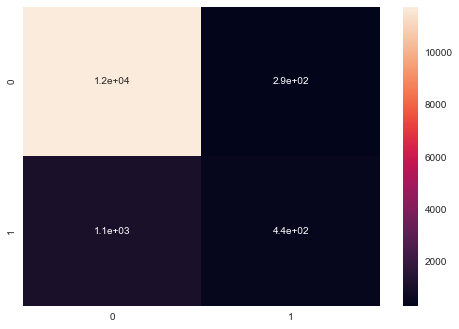

In [52]:
sns.heatmap(cm,annot=True)

In [53]:
print(classification_report(y_test,pred_rf))

              precision    recall  f1-score   support

           1       0.93      0.96      0.94     12030
           2       0.58      0.41      0.48      1534

    accuracy                           0.90     13564
   macro avg       0.75      0.69      0.71     13564
weighted avg       0.89      0.90      0.89     13564



In [54]:
model_log.score(X_test,y_test)

0.8980389265703332

In [55]:
model_rf.score(X_test,y_test)

0.8993659687407844

# Handling imbalanced data

In [56]:
#pip install imbalanced-learn

In [57]:
#Splitting to x and y 
X_new=bank.drop(['Subscription','Housing Loan','Personal Loan'],axis=1)
y_new=bank['Subscription']
print(len(X))
print(len(y))

45211
45211


In [58]:
#Divide into training and testing set
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_new,y_new,test_size=0.3,random_state=7)

In [59]:
y_train_new.value_counts()

1    27892
2     3755
Name: Subscription, dtype: int64

In [60]:
#Data Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_new=sc.fit_transform(X_train_new)
X_test_new=sc.transform(X_test_new)
y_train_new.value_counts()

1    27892
2     3755
Name: Subscription, dtype: int64

In [62]:
# define undersample strategy
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority')


In [63]:
X_train_us, y_train_us = undersample.fit_resample(X_train_new, y_train_new)
y_train_us.value_counts()

1    3755
2    3755
Name: Subscription, dtype: int64

In [64]:
model_log.fit(X_train_us,y_train_us)

LogisticRegression()

In [65]:
pred_log_us=model_log.predict(X_test_new)
print(metrics.accuracy_score(y_test_new,pred_log_us))

0.8195222648186375


In [66]:
model_rf.fit(X_train_us,y_train_us)

RandomForestClassifier(n_estimators=7)

In [67]:
pred_rf_us=model_rf.predict(X_test_new)
print(metrics.accuracy_score(y_test_new,pred_rf_us))

0.805662046593925


In [68]:
cm1=confusion_matrix(y_test_new,pred_rf_us)
cm1

array([[9632, 2398],
       [ 238, 1296]], dtype=int64)

In [69]:
model_rf.score(X_test_new,y_test_new)

0.805662046593925

In [70]:
print(classification_report(y_test_new,pred_log_us))

              precision    recall  f1-score   support

           1       0.97      0.82      0.89     12030
           2       0.37      0.82      0.51      1534

    accuracy                           0.82     13564
   macro avg       0.67      0.82      0.70     13564
weighted avg       0.90      0.82      0.85     13564



In [71]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 0)
X_train_sm, y_train_sm = smote.fit_resample(X_train_new, y_train_new)
y_train_sm.value_counts()

1    27892
2    27892
Name: Subscription, dtype: int64

In [72]:
model_log.fit(X_train_sm,y_train_sm)
pred_log_sm=model_log.predict(X_test_new)
print(metrics.accuracy_score(y_test_new,pred_log_sm))

0.8263049248009436


In [73]:
model_rf.fit(X_train_sm,y_train_sm)
pred_rf_sm=model_rf.predict(X_test_new)
print(metrics.accuracy_score(y_test_new,pred_rf_sm))

0.8839575346505456


In [74]:
print(classification_report(y_test_new,pred_rf_sm))

              precision    recall  f1-score   support

           1       0.94      0.93      0.93     12030
           2       0.49      0.55      0.52      1534

    accuracy                           0.88     13564
   macro avg       0.72      0.74      0.73     13564
weighted avg       0.89      0.88      0.89     13564



In [75]:
print(classification_report(y_test_new,pred_log_sm))

              precision    recall  f1-score   support

           1       0.97      0.83      0.89     12030
           2       0.38      0.81      0.51      1534

    accuracy                           0.83     13564
   macro avg       0.67      0.82      0.70     13564
weighted avg       0.90      0.83      0.85     13564



In [76]:
from sklearn.tree import DecisionTreeClassifier
cf=DecisionTreeClassifier(random_state=6)
cf.fit(X_train_sm,y_train_sm)
pred_dt_sm=cf.predict(X_test_new)

In [77]:
print(metrics.accuracy_score(y_test_new,pred_dt_sm))

0.8549100560306694


In [78]:
print(classification_report(y_test_new,pred_dt_sm))

              precision    recall  f1-score   support

           1       0.94      0.89      0.92     12030
           2       0.40      0.54      0.46      1534

    accuracy                           0.85     13564
   macro avg       0.67      0.72      0.69     13564
weighted avg       0.88      0.85      0.86     13564



In [79]:
from sklearn.model_selection import KFold
kfold_validation=KFold(10)
from sklearn.model_selection import cross_val_score
results=cross_val_score(cf,X,y,cv=kfold_validation)
print(results)
print(np.mean(results))

[0.92967713 0.81619111 0.7987171  0.83056846 0.81021898 0.82393276
 0.71112586 0.83698297 0.81574873 0.56779474]
0.7940957824124306


In [80]:
#test-train+kfold
from sklearn.model_selection import ShuffleSplit
#model=RFTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
res=cross_val_score(model_rf,X,y,cv=ssplit)

In [81]:
res

array([0.89516367, 0.89457387, 0.89523739, 0.89730168, 0.89472132,
       0.89457387, 0.8946476 , 0.89619581, 0.89899735, 0.89413152])

In [82]:
y.value_counts()

1    39922
2     5289
Name: Subscription, dtype: int64

In [83]:
#Data Scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
Xnew=sc.fit_transform(X)
y.value_counts()

1    39922
2     5289
Name: Subscription, dtype: int64

In [84]:
X_us, y_us = undersample.fit_resample(Xnew, y)
y_us.value_counts()

1    5289
2    5289
Name: Subscription, dtype: int64

In [85]:
#test-train+kfold
from sklearn.model_selection import ShuffleSplit
#model=RandomForestTreeClassifier()
ssplit=ShuffleSplit(n_splits=10,test_size=0.30)
res=cross_val_score(model_rf,Xnew,y,cv=ssplit)

In [86]:
res.mean()

0.8961884399882042

Random Forest Algorithm gives a better and stable score